# Zero Shot Classification With CLIP

Here we'll be using CLIP to classify images of vehicles as "helicopter","plane" or "car".

So we call this zero shot classification because the model hasnt been trained on "helicopter" vs "plane" vs "car".

In [1]:
from transformers import CLIPProcessor, CLIPModel

/home/saad1926q/vlm-fun/vlm-env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
import torch
import torch.nn.functional as F

In [3]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")

In [4]:
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [35]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

def display_img(url,label):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.axis('off')  
    plt.title(label=f"prediction:{label}")
    plt.show()

def get_img(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

In [6]:
urls=[
    'https://www.autocar.co.uk/sites/autocar.co.uk/files/styles/body-image/public/rolls-rocyce-cullinan-top_10.jpg',
    'https://images.pexels.com/photos/46148/aircraft-jet-landing-cloud-46148.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500',
    'https://images.pexels.com/photos/18199333/pexels-photo-18199333/free-photo-of-helicopter-during-flight.jpeg'
]

In [7]:
labels=['helicopter','car','plane']

In [8]:
input_images=[get_img(url) for url in urls]

In [9]:
inputs=processor(images=input_images,text=labels,return_tensors="pt")

In [10]:
inputs

{'input_ids': tensor([[49406, 11956, 49407],
        [49406,  1615, 49407],
        [49406,  5363, 49407]]), 'attention_mask': tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]), 'pixel_values': tensor([[[[ 1.5800,  1.5946,  1.5946,  ...,  1.6676,  1.6676,  1.6676],
          [ 1.5946,  1.5946,  1.5946,  ...,  1.6676,  1.6676,  1.6676],
          [ 1.6092,  1.5946,  1.5946,  ...,  1.6676,  1.6676,  1.6676],
          ...,
          [ 0.3683,  0.3829,  0.3829,  ...,  0.3683,  0.3975,  0.4267],
          [ 0.2661,  0.2515,  0.2807,  ...,  0.3683,  0.3683,  0.3537],
          [ 0.2953,  0.3099,  0.3099,  ...,  0.4559,  0.4851,  0.4413]],

         [[ 1.6997,  1.7147,  1.7147,  ...,  1.7897,  1.7897,  1.7897],
          [ 1.7147,  1.7147,  1.7147,  ...,  1.7897,  1.7897,  1.7897],
          [ 1.7297,  1.7147,  1.7147,  ...,  1.7897,  1.7897,  1.7897],
          ...,
          [ 0.2740,  0.2890,  0.2890,  ...,  0.2289,  0.2740,  0.3040],
          [ 0.1689,  0.1539,  0.1839,  ...,  0

In [11]:
with torch.no_grad():
    outputs=model(**inputs)

In [12]:
outputs

CLIPOutput(loss=None, logits_per_image=tensor([[16.0861, 22.7781, 16.7077],
        [18.9305, 18.3161, 25.2162],
        [25.3622, 18.4640, 19.2115]]), logits_per_text=tensor([[16.0861, 18.9305, 25.3622],
        [22.7781, 18.3161, 18.4640],
        [16.7077, 25.2162, 19.2115]]), text_embeds=tensor([[ 0.0166, -0.0234,  0.0274,  ..., -0.0094, -0.0268, -0.0304],
        [ 0.0060,  0.0098,  0.0035,  ..., -0.0224, -0.0248,  0.0104],
        [ 0.0016,  0.0025,  0.0018,  ..., -0.0048,  0.0112, -0.0017]]), image_embeds=tensor([[ 0.0571,  0.0583, -0.0065,  ...,  0.0799,  0.0303, -0.0083],
        [ 0.0135,  0.0423, -0.0294,  ...,  0.0368, -0.0125, -0.0209],
        [ 0.0475, -0.0154, -0.0383,  ...,  0.0534, -0.0416, -0.0260]]), text_model_output=BaseModelOutputWithPooling(last_hidden_state=tensor([[[ 0.3393,  0.1165,  0.1020,  ...,  0.2468,  0.5906,  0.1013],
         [ 0.6864,  1.8488, -0.0850,  ...,  0.0429,  0.5598,  0.2691],
         [ 1.0077, -0.0485,  0.6238,  ...,  0.7058,  0.7714, -0.9

In [13]:
text_embeddings=outputs.text_embeds

In [16]:
text_embeddings.shape

torch.Size([3, 512])

In [17]:
img_embeddings=outputs.image_embeds

In [18]:
img_embeddings.shape

torch.Size([3, 512])

logits_per_image is essentially a matrix which contains similarrity scores between image and text pairs
each row represents an image
and each column represents a text

In [25]:
logits_per_img=outputs.logits_per_image

In [26]:
logits_per_img

tensor([[16.0861, 22.7781, 16.7077],
        [18.9305, 18.3161, 25.2162],
        [25.3622, 18.4640, 19.2115]])

In [27]:
probs=logits_per_img.softmax(dim=1)

In [28]:
probs

tensor([[0.0012, 0.9965, 0.0023],
        [0.0019, 0.0010, 0.9971],
        [0.9969, 0.0010, 0.0021]])

In [31]:
preds=torch.argmax(probs,dim=1)

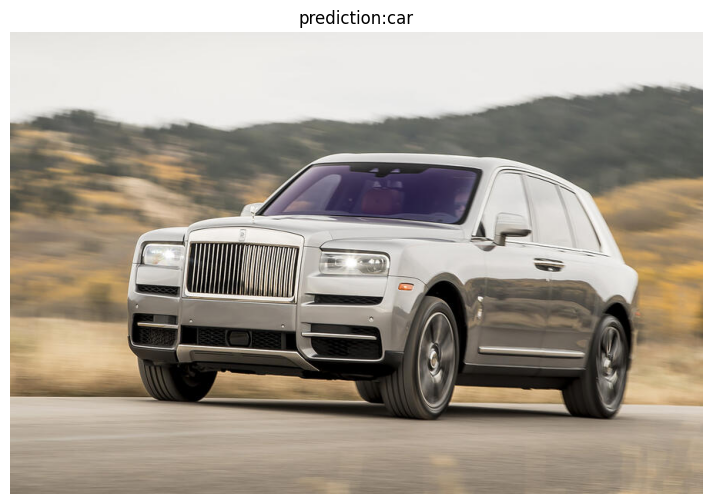

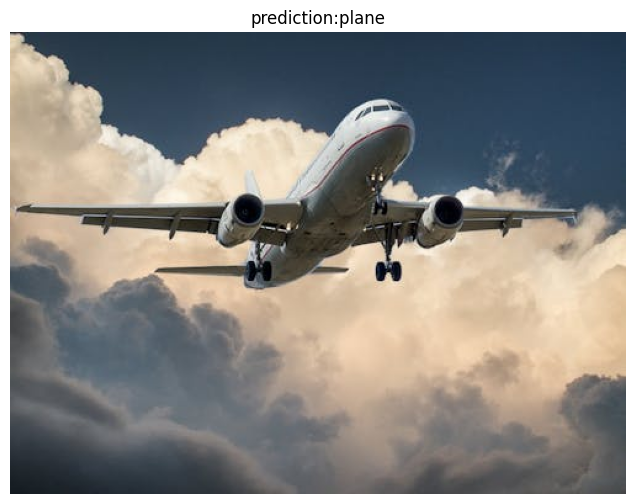

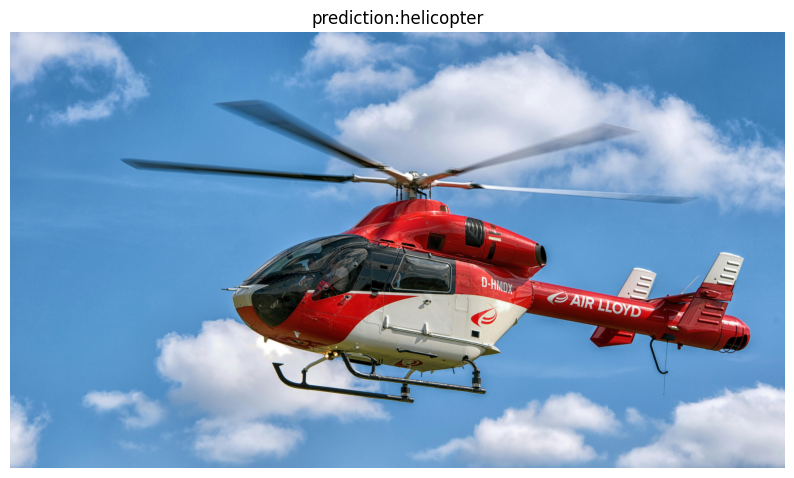

In [36]:
for i in range(len(input_images)):
    pred_label=labels[preds[i]]
    display_img(url=urls[i],label=pred_label)